<a href="https://colab.research.google.com/github/Yogendra-805/Smile-detection-using-machine-learning/blob/main/IDC409_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries.
import os
import random
from imutils import paths
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pylab import *
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_folder = "/content/drive/MyDrive/Colab Notebooks/train_folder"
test_folder = "/content/drive/MyDrive/Colab Notebooks/test_folder"

In [ ]:
def dataextractor(path):
    img_height=32
    img_width=32
    data=[]
    labels = []
    imagepaths = list(paths.list_images(path))
    for imagepath in imagepaths:
        image = cv2.imread(imagepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image,(img_height,img_width),interpolation=cv2.INTER_AREA)
        image = np.asarray(image, dtype=dtype)
        label = imagepath.split(os.sep)[-2] # To find out image labels
        label = int(label)
        labels.append(label)
        data.append(image)
    return np.array(data,dtype='float')/255.0, np.array(labels)

In [ ]:
# splitting the data into train and test
train_X,train_y = dataextractor(train_folder)
test_X,test_y = dataextractor(test_folder)

In [ ]:
train_X = train_X.reshape(2800,1024)
test_X = test_X.reshape(1200,1024)

In [ ]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(2800, 1024)
(2800,)
(1200, 1024)
(1200,)


# Training through SVM

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear')

In [ ]:
model.fit(train_X, train_y)

SVC(kernel='linear')

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics

In [ ]:
print("Accuracy on training set:",model.score(train_X, train_y))

Accuracy on training set: 0.8932142857142857


In [ ]:
print ("Accuracy on testing set:", model.score(test_X, test_y))

Accuracy on testing set: 0.7775


In [ ]:
y_pred = model.predict(test_X)
print ("Classification Report:", metrics.classification_report(test_y, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.74      0.77       600
           1       0.76      0.81      0.78       600

    accuracy                           0.78      1200
   macro avg       0.78      0.78      0.78      1200
weighted avg       0.78      0.78      0.78      1200



In [ ]:
conf_mx = metrics.confusion_matrix(test_y, y_pred)
print ("Confusion Matrix: \n",conf_mx )

Confusion Matrix: 
 [[447 153]
 [114 486]]


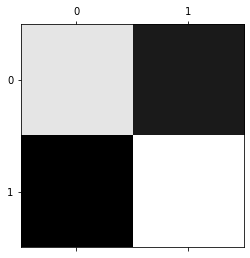

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

[1]


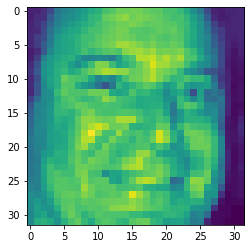

In [ ]:
print(model.predict(test_X[200].reshape(1,1024)))

imshow((test_X[200].reshape(1,1024)).reshape(32,32))

#Training through LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
mod = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
mod.fit(train_X, train_y)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
mod.classes_

array([0, 1])

In [ ]:
mod.intercept_, mod.coef_

(array([0.04202978]),
 array([[-0.31067917,  0.50317309, -0.1298101 , ...,  0.17004653,
         -0.64292996,  0.20108838]]))

In [ ]:
print("Accuracy on training set:",mod.score(train_X, train_y))

Accuracy on training set: 0.8667857142857143


In [ ]:
print ("Accuracy on testing set:", mod.score(test_X, test_y))

Accuracy on testing set: 0.7975


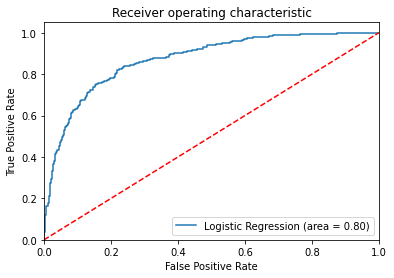

In [ ]:
# Ploting ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(test_y, mod.predict(test_X))
fpr, tpr, thresholds = roc_curve(test_y, mod.predict_proba(test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Training through Random Foret Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
clf.fit(train_X, train_y)

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
print ("Accuracy on testing set:", clf.score(test_X, test_y))

Accuracy on testing set: 0.7525


In [ ]:
print("Accuracy on training set:",clf.score(train_X, train_y))

Accuracy on training set: 0.9914285714285714


In [ ]:
print ("Classification Report:", metrics.classification_report(test_y, clf.predict(test_X)))

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.67      0.73       600
           1       0.72      0.83      0.77       600

    accuracy                           0.75      1200
   macro avg       0.76      0.75      0.75      1200
weighted avg       0.76      0.75      0.75      1200



In [ ]:
print ("Confusion Matrix: \n",metrics.confusion_matrix(test_y, clf.predict(test_X)) )

Confusion Matrix: 
 [[403 197]
 [100 500]]


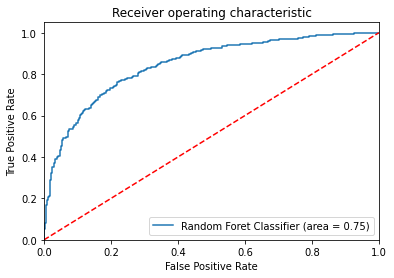

In [ ]:
# Ploting ROC Curve
logit_roc_auc = roc_auc_score(test_y, clf.predict(test_X))
fpr, tpr, thresholds = roc_curve(test_y, clf.predict_proba(test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Foret Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()